### 201600974 무역학과 김효훈 HomeWork

In [464]:
import numpy
import scipy.special

class neuralNetWorkTwoHidden:
    
    def __init__(self,inputnodes,hiddennodes,secondhnodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.shnodes = secondhnodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5), (self.hnodes,self.inodes))
        self.whh = numpy.random.normal(0.0,pow(self.shnodes,-0.5), (self.shnodes,self.hnodes))
        self.who = numpy.random.normal(0.0,pow(self.onodes,-0.5), (self.onodes,self.shnodes))
                
        self.activation_function = lambda x: scipy.special.expit(x)
        #입력,히든,출력노드 개수, 학습률, 입-히, 히-출, 시그모이드함수 설정

    
    def train(self, inputs_list,targets_list):  #오차를 얻어야 하므로 타겟이 있음
        inputs = numpy.array(inputs_list, ndmin=2).transpose()   #행렬계산을 위해 세로로 행렬배치
        targets = numpy.array(targets_list,ndmin=2).transpose()
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        #은닉노드로 들어가는 수는 (인풋-히든 가중치 점곱 인풋) 순전파 첫번째 가중치
        hidden_outputs = self.activation_function(hidden_inputs) 
        #은닉노드에서 나온 수를 활성화 함수에 적용. 순전파 첫번째 활성화
    
        hidden2_inputs = numpy.dot(self.whh,hidden_outputs)
        hidden2_outputs = self.activation_function(hidden2_inputs)
    
        final_inputs = numpy.dot(self.who, hidden2_outputs)
        #출력노드로 들어가는 수는 (히든-출력가중치 점곱 순전파 첫번째 결과)
        final_outputs = self.activation_function(final_inputs)
        #출력노드에서 나온 수는 활성화 함수에 적용 해서 순전파 결과 얻어냄
        #순전파 끝
        
        #역전파 시작
        output_errors = targets - final_outputs # 목표 - 오차
        
        hidden2_errors = numpy.dot(self.who.transpose(),output_errors)
        
        hidden_errors = numpy.dot(self.whh.transpose(),hidden2_errors) # 역전파 출력-히든 (정규화 됨)
        
        self.who += self.lr * numpy.dot((output_errors* final_outputs * (1.0-final_outputs)),numpy.transpose(hidden2_outputs))    
        self.whh += self.lr * numpy.dot((hidden2_errors* hidden2_outputs * (1.0-hidden2_outputs)),numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors* hidden_outputs * (1.0-hidden_outputs)),numpy.transpose(inputs))
        
        
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).transpose()   #행렬계산을 위해 세로로 행렬배치
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        #은닉노드로 들어가는 수는 (인풋-히든 가중치 점곱 인풋) 순전파 첫번째 가중치
        hidden_outputs = self.activation_function(hidden_inputs) 
        #은닉노드에서 나온 수를 활성화 함수에 적용. 순전파 첫번째 활성화
    
        hidden2_inputs = numpy.dot(self.whh,hidden_outputs)
        hidden2_outputs = self.activation_function(hidden2_inputs)
    
        final_inputs = numpy.dot(self.who, hidden2_outputs)
        #출력노드로 들어가는 수는 (히든-출력가중치 점곱 순전파 첫번째 결과)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs 
    
    

In [465]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import glob
import random

input_nodes =4
hidden_nodes =50
shidden_nodes =50
output_nodes =3

learning_rate =0.05
n = neuralNetWorkTwoHidden(input_nodes,hidden_nodes,shidden_nodes,output_nodes,learning_rate)

학습률 : 0.0 performance : 0.8
학습률 : 0.01 performance : 0.3333333333333333
학습률 : 0.02 performance : 0.8
학습률 : 0.03 performance : 0.9333333333333333
학습률 : 0.04 performance : 0.8
학습률 : 0.05 performance : 0.8666666666666667
학습률 : 0.06 performance : 0.7666666666666667
학습률 : 0.07 performance : 0.9333333333333333
학습률 : 0.08 performance : 0.7666666666666667
학습률 : 0.09 performance : 0.8333333333333334
학습률 : 0.1 performance : 0.8333333333333334
주기 수:  100 첫번째 히든노드 개수:  50  두번째 노드개수:  50 이름: 201600974 무역학과 김효훈


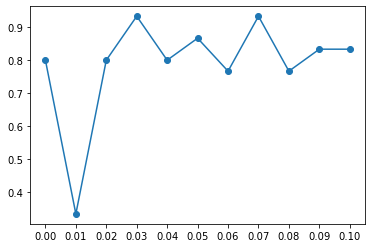

In [473]:
training_data_file = open("HomeWorkData/iris_Train.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

def adjust(inputs):
                                # 꽃의 종류별로 특성에 맞게 데이터를 조정해주어야 한다.
    inputs[2] -= 3             # 그래야 각 꽃 별로 어떤 부분에서 특히 높은 값을 가질 수 있다. 
    if(inputs[2]<0):
        inputs[2] =0.01
        
    inputs[1] -= 2.5
    if(inputs[1]<0):
        inputs[1] = 0.01
    
    inputs[0] -= 5
    if(inputs[0]<0):
        inputs[0] = 0.01
    
epochs =100

learning_rates = []
scores = []
for i in range(11):
    learning_rate = (i*0.01)
    n = neuralNetWorkTwoHidden(input_nodes,hidden_nodes,shidden_nodes,output_nodes,learning_rate)
    
    
    for e in range(epochs):
        for record in training_data_list:
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[:4]))
            adjust(inputs)
            inputs[0] = ((inputs[0]/3)*(0.98)+0.01) #데이터의 특성에 맞게 1이 넘어가지 않도록 조정해 줌
            inputs[1] = ((inputs[1]/2)*(0.98)+0.01)
            inputs[2] = ((inputs[2]/3)*(0.98)+0.01)
            inputs[3] = ((inputs[3]/3)*(0.98)+0.01)

            if(all_values[4] == "Iris-setosa\n"):   # 꽃의 종류를 인데긋로 판단할 예정 
                all_values[4] = 0
            if(all_values[4] == "Iris-versicolor\n"):
                all_values[4] = 1
            if(all_values[4] == "Iris-virginica\n"):
                all_values[4] = 2

            targets = numpy.zeros(output_nodes) + 0.01 
            targets[int(all_values[4])] = 0.99       # 각 꽃은 자신의 이름에 맞춰 부여된 인덱스에 해당하는 아웃풋을 타겟으로함
            n.train(inputs, targets)


    test_data_file = open("HomeWorkData/iris_Test.csv","r")
    test_data_list = test_data_file.readlines()
    test_data_file.close()

    scorecard = []

    for record in test_data_list:
        all_values = record.split(',')
        if(all_values[4] == "Iris-setosa\n"):
            all_values[4] = 0
        if(all_values[4] == "Iris-versicolor\n"):
            all_values[4] = 1
        if(all_values[4] == "Iris-virginica\n"):
            all_values[4] = 2
        correct_label = all_values[4]

        inputs = (numpy.asfarray(all_values[:4]))
        adjust(inputs)
        inputs[0]= ((inputs[0]/3) *(0.98)+0.01) #데이터의 특성에 맞게 1이 넘어가지 않도록 조정해 줌
        inputs[1] = ((inputs[1]/2)*(0.98)+0.01)
        inputs[2] = ((inputs[2]/3)*(0.98)+0.01)
        inputs[3] = ((inputs[3]/3)*(0.98)+0.01)
  
        outputs = n.query(inputs)

        label = numpy.argmax(outputs)            # 아웃풋에서 가장 높은 값이 인공지능이 추측하는 값이 됨
        if(label == correct_label):              # 그 값을 지금 검사하는 데이터의 종류와 비교함
            scorecard.append(1)
        else:
            scorecard.append(0)
    
    print("학습률 :", learning_rate, "performance :",scorecard_array.sum()/scorecard_array.size)
    
    learning_rates.append(learning_rate)
    scores.append(scorecard_array.sum()/scorecard_array.size)
    scorecard_array = numpy.asarray(scorecard)


plt.xticks(numpy.arange(0,0.11, step=0.01))
plt.scatter(learning_rates,scores)
plt.plot(learning_rates,scores)
print("주기 수: ",epochs,"첫번째 히든노드 개수: ",hidden_nodes," 두번째 노드개수: ",shidden_nodes, "이름: 201600974 무역학과 김효훈")
input_nodes =4
hidden_nodes =50
shidden_nodes =50
output_nodes =3
# 꽃받침길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비 순
#인풋노드 개수, output노드 개수가 4,3인 이유는, 인풋의 경우, 4가지의 데이터 카테고리를 받았으므로, 이 정보들을 가지고 어떤 꽃종류인지 알아내야한다.
#아웃풋 노드의 경우, 꽃의 종류는 3가지로 나눌 수 있으므로, 우리가 답을 받는 부분에는 이 3가지에 해당해야한다.

#테스트 결과 정확도, 학습률에 따른 그래프 표현 권장

### 201600974 무역학과 김효훈 Homework